# Plotter
Drawing final plots for results using this notebook depends on having the output of `systematics-fit.ipynb` as well as the initial results from `src/data/bsa.py`.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('text', usetex=True)

In [2]:
!mkdir -p image/

In [3]:
data = {}
data['phi'] = pd.read_csv('results/phi/sys.csv')
data['fit'] = pd.read_csv('results/fit/sys.csv')
#data['fit'] = pd.read_csv('replica-test.csv')

In [4]:
data['fit'].columns

Index(['axis', 'axis_bin', 'axis_max', 'axis_min', 'bootstraps_0',
       'bootstraps_1', 'bootstraps_2', 'err_0', 'err_1', 'err_2', 'par_0',
       'par_1', 'par_2', 'sys_total_0', 'sys_total_1', 'sys_total_2',
       'sys_8_par0', 'sys_8_par1', 'sys_8_par2', 'sys_1_par0', 'sys_1_par1',
       'sys_1_par2', 'sys_4_par0', 'sys_4_par1', 'sys_4_par2', 'sys_3_par0',
       'sys_3_par1', 'sys_3_par2', 'sys_5_par0', 'sys_5_par1', 'sys_5_par2',
       'sys_7_par0', 'sys_7_par1', 'sys_7_par2', 'sys_6_par0', 'sys_6_par1',
       'sys_6_par2', 'sys_10_par0', 'sys_10_par1', 'sys_10_par2', 'sys_9_par0',
       'sys_9_par1', 'sys_9_par2', 'sys_2_par0', 'sys_2_par1', 'sys_2_par2',
       'sys_11_par0', 'sys_11_par1', 'sys_11_par2'],
      dtype='object')

In [5]:
sector_systematics = pd.read_csv('database/fit/sector_systematics.csv')

In [6]:
data['fit']['sys_sector_par0'] = sector_systematics['rmse'] 

In [7]:
def plot_fit_summary(results, par):

    latex = {}
    latex['x'] = '$x$'
    latex['z'] = '$z$'
    latex['pt'] = '$P_T$'
    latex['q2'] = '$Q^2$'
    
    limits = {}
    limits['x'] = [0.0, 0.7]
    limits['z'] = [0.0, 1.0]
    limits['pt'] = [0.0, 1.2]
    limits['q2'] = [0.5, 5.5]
    
    label = {}
    label[0] = '$A_{LU}^{\sin\phi}$'
    label[1] = '$A_{UU}^{\cos\phi}$'
    label[2] = '$A_{UU}^{\cos(2\phi)}$'    
    
    unique_axes = np.unique(results.axis)
    axes = [axis for axis in unique_axes if axis != 'missing_mass']
    
    n_col = 2
    n_row = 1 + np.ceil(len(axes)/n_col)
    plt.figure(figsize=(5*n_col, 3*n_row))
    
    for index, axis in enumerate(axes):
        plt.subplot(n_row, n_col, index+1)
        d = results.query('axis == "%s"' % axis)

        plt.errorbar(d.axis_min + 0.5*(d.axis_max-d.axis_min), d['par_%d' % par], d['err_%d' % par],
                        linestyle='', marker='o', color='black')

        if ('sys_total_%d' % par) in d.columns:
            positions = d.axis_min + 0.5*(d.axis_max-d.axis_min)
            heights = d['sys_total_%d' % par]
            widths = d.axis_max-d.axis_min
            
            for p,h,w in zip(positions,heights,widths):
                plt.bar(p,h,width=w,edgecolor='k',alpha=0.7,color='red')
        
        if ('sys_sector_par%d' % par) in d.columns:
            positions = d.axis_min + 0.5*(d.axis_max-d.axis_min)
            heights = d['sys_sector_par%d' % par]
            bottoms = d['sys_total_%d' % par]
            widths = d.axis_max-d.axis_min
            
            for p,h,w,b in zip(positions,heights,widths,bottoms):
                plt.bar(p,h,width=w,bottom=b,edgecolor='k',alpha=0.7,color='orange') 
            
        plt.xlabel(latex[axis])
        plt.ylabel(label[par])
        
        if par == 0:
            plt.ylim([0.0, 0.06])

        plt.xlim(limits[axis])
        plt.axhline(0.0, color='black', alpha=0.7, linestyle='--', linewidth=1.0)
        
    plt.tight_layout()

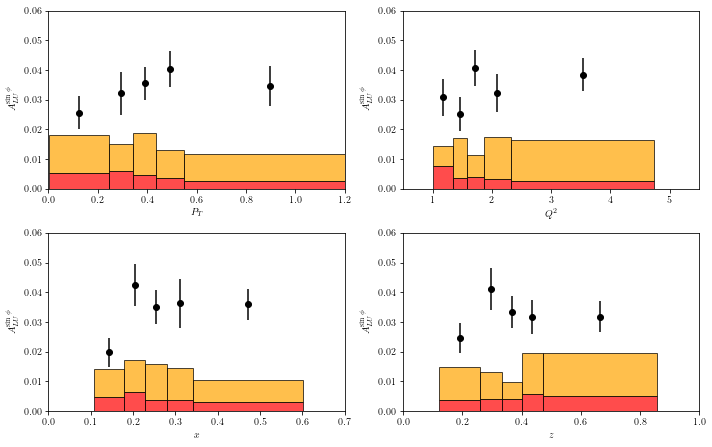

In [8]:
plot_fit_summary(data['fit'], 0)
plt.savefig('image/alu_sin.pdf', bbox_inches='tight')

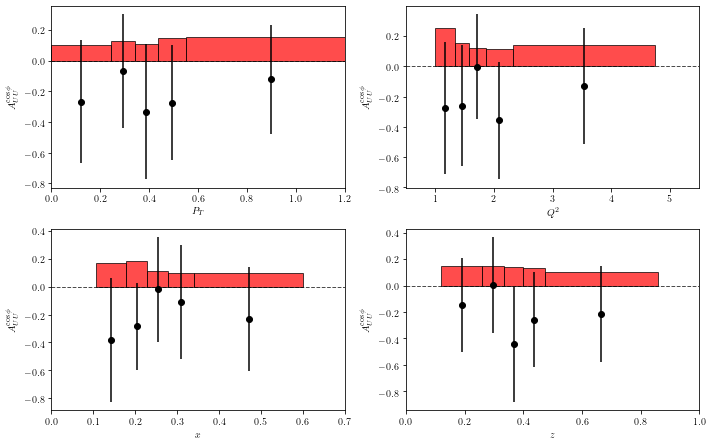

In [10]:
plot_fit_summary(data['fit'], 1)
plt.savefig('image/auu_cos.pdf', bbox_inches='tight')

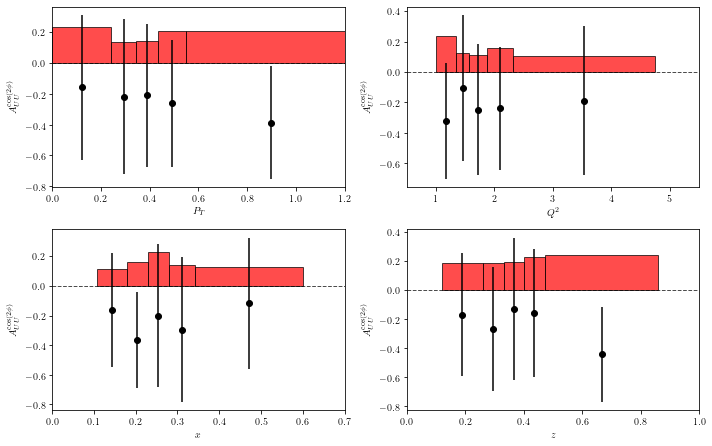

In [11]:
plot_fit_summary(data['fit'], 2)
plt.savefig('image/auu_cos2.pdf', bbox_inches='tight')

### Compare With/Without Momentum Cut
The systematic coming from the kaon momentum is very important, below I plot the difference in the two results.

In [11]:
data['kaon_momentum_cut'] = pd.read_csv('database/fit/variation_p_mes_-1.csv')
data['kaon_momentum_nocut'] = pd.read_csv('database/fit/variation_p_mes_1.csv')

In [12]:
def compare_fit_summary(results1, results2, label1, label2, par):

    latex = {}
    latex['x'] = '$x$'
    latex['z'] = '$z$'
    latex['pt'] = '$P_T$'
    latex['q2'] = '$Q^2$'
    latex['missing_mass'] = '$M_X$'
    
    limits = {}
    limits['x'] = [0.0, 0.7]
    limits['z'] = [0.0, 1.0]
    limits['pt'] = [0.0, 1.2]
    limits['q2'] = [0.5, 5.5]
    limits['missing_mass'] = [1.2, 2.5]
    
    label = {}
    label[0] = '$A_{LU}^{\sin\phi}$'
    label[1] = '$A_{UU}^{\cos\phi}$'
    label[2] = '$A_{UU}^{\cos(2\phi)}$'    
    
    axes = np.unique(results1.axis)
    
    n_col = 2
    n_row = 1 + np.ceil(len(axes)/n_col)
    plt.figure(figsize=(6*n_col, 4*n_row))
    
    for index, axis in enumerate(axes):
        plt.subplot(n_row, n_col, index+1)
        d1 = results1.query('axis == "%s"' % axis)
        d2 = results2.query('axis == "%s"' % axis)
        
        plt.errorbar(d1.axis_min + 0.5*(d1.axis_max-d1.axis_min), d1['par_%d' % par], d1['err_%d' % par],
                    linestyle='', marker='o', color='black', label=label1)        
        plt.errorbar(d2.axis_min + 0.5*(d2.axis_max-d2.axis_min), d2['par_%d' % par], d2['err_%d' % par],
                    linestyle='', marker='o', color='red', label=label2)
        
        
        plt.xlabel(latex[axis])
        plt.ylabel(label[par])
        plt.ylim([-0.01, 0.06])
        plt.xlim(limits[axis])
        plt.axhline(0.0, color='black', alpha=0.7, linestyle='--', linewidth=1)
        plt.legend(frameon=False)
        
    plt.tight_layout()

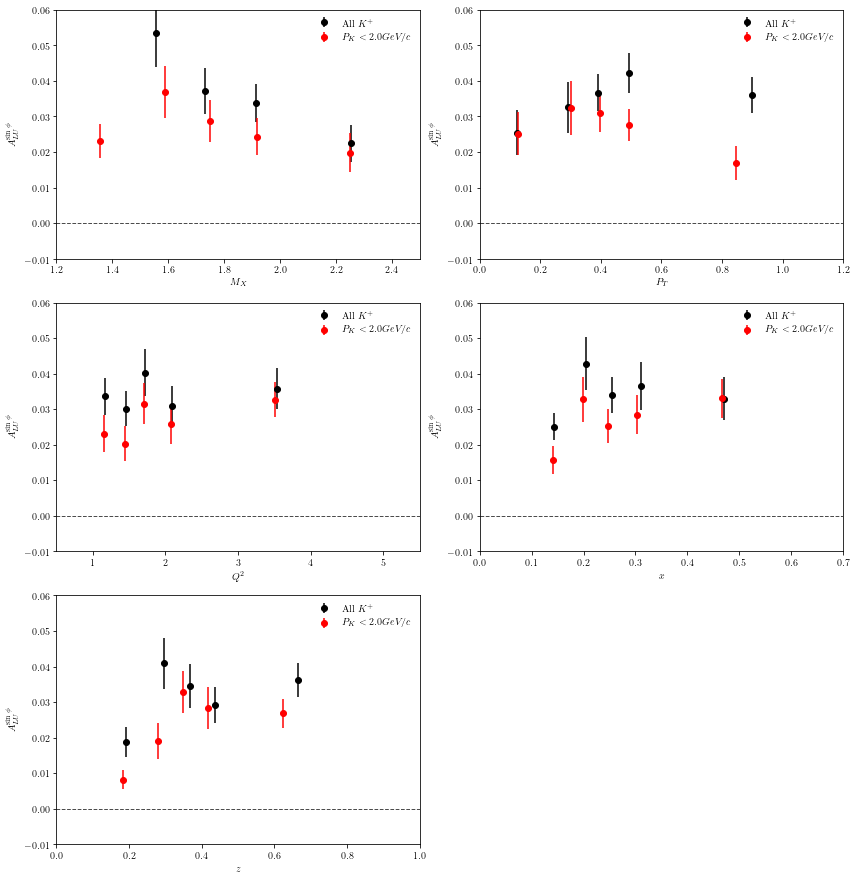

In [13]:
compare_fit_summary(
    data['kaon_momentum_cut'], 
    data['kaon_momentum_nocut'], 
    'All $K^+$',
    '$P_K < 2.0 GeV/c$',
    par=0)
plt.savefig('image/alu_sin_compare_momentum.pdf', bbox_inches='tight')

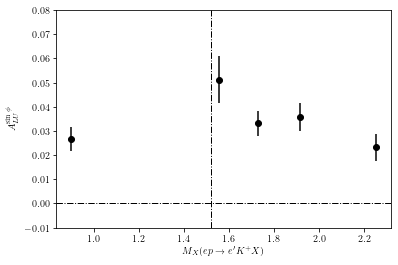

In [12]:
mm_data = data['fit'][data['fit']['axis'] == "missing_mass"]

plt.errorbar(
    mm_data.axis_min + 0.5*(mm_data.axis_max-mm_data.axis_min),
    mm_data['par_0'],
    mm_data['err_0'],
    linestyle='',
    marker='o',
    color='black'
)
plt.axvline(1.520, linestyle='-.', linewidth=1, color='k')
plt.xlabel('$M_X (ep \\rightarrow e\'K^+X)$')
plt.ylabel('$A_{LU}^{\sin\phi}$')
plt.axhline(0.0, linestyle='-.', linewidth=1, color='k')
plt.ylim([-0.01, 0.08])
plt.savefig('image/alu_sin_missing_mass.pdf', bbox_inches='tight')

In [15]:
data['fit']['axis']

0     missing_mass
1     missing_mass
2     missing_mass
3     missing_mass
4     missing_mass
5               pt
6               pt
7               pt
8               pt
9               pt
10              q2
11              q2
12              q2
13              q2
14              q2
15               x
16               x
17               x
18               x
19               x
20               z
21               z
22               z
23               z
24               z
Name: axis, dtype: object

# Draw Systematic Heatmaps

In [16]:
cols_to_plot = [col for col in data['fit'].columns if 'par0' in col and 'sys' in col]
print('Plotting {}'.format(cols_to_plot))

Plotting ['sys_8_par0', 'sys_1_par0', 'sys_4_par0', 'sys_3_par0', 'sys_5_par0', 'sys_7_par0', 'sys_6_par0', 'sys_10_par0', 'sys_9_par0', 'sys_2_par0', 'sys_11_par0', 'sys_sector_par0']


In [17]:
import seaborn as sns 
plt.rc('text', usetex=False)

In [18]:
import pickle 

with open('systematic_sources.pkl', 'rb') as inputfile:
    systematic_sources = pickle.load(inputfile)

In [19]:
systematic_sources

{'sys_1': 'alpha',
 'sys_2': 'dist_cc',
 'sys_3': 'dist_dcr1',
 'sys_4': 'dist_dcr3',
 'sys_5': 'dist_ec_edep',
 'sys_6': 'dist_ecsf',
 'sys_7': 'dist_ecu',
 'sys_8': 'dist_ecv',
 'sys_9': 'dist_ecw',
 'sys_10': 'dist_vz',
 'sys_11': 'p_mes',
 'sys_0': 'beam_pol'}

In [20]:
sys_sources = {}
for key, value in systematic_sources.items():
    sys_sources[key + '_par0'] = value

In [21]:
systematic_names = {}
systematic_names['beam_pol'] = 'Beam polarization'
systematic_names['dist_dcr1'] = 'Fid. DC R1'
systematic_names['dist_dcr3'] = 'Fid. DC R3'
systematic_names['dist_cc'] = 'Fid. CC'
systematic_names['dist_ecu'] = 'EC-U'
systematic_names['dist_ecv'] = 'EC-V'
systematic_names['dist_ecw'] = 'EC-W'
systematic_names['dist_vz'] = 'z-vertex'
systematic_names['dist_ecsf'] = 'Sampling fraction'
systematic_names['p_mes'] = 'Kaon momentum'
systematic_names['alpha'] = 'Confidence (Kaon ID)'
systematic_names['dist_ec_edep'] = 'EC energy deposition'
systematic_names['missing_mass'] = 'Missing mass'
systematic_names['dvz'] = 'Vertex difference'

In [22]:
sys_sources

{'sys_1_par0': 'alpha',
 'sys_2_par0': 'dist_cc',
 'sys_3_par0': 'dist_dcr1',
 'sys_4_par0': 'dist_dcr3',
 'sys_5_par0': 'dist_ec_edep',
 'sys_6_par0': 'dist_ecsf',
 'sys_7_par0': 'dist_ecu',
 'sys_8_par0': 'dist_ecv',
 'sys_9_par0': 'dist_ecw',
 'sys_10_par0': 'dist_vz',
 'sys_11_par0': 'p_mes',
 'sys_0_par0': 'beam_pol'}

In [23]:
sys_index_to_name = {}

for key, val in sys_sources.items():
    sys_index_to_name[key] = systematic_names[val]
    
sys_index_to_name['sys_sector_par0'] = 'Sector RMSE'
print(sys_index_to_name)

{'sys_1_par0': 'Confidence (Kaon ID)', 'sys_2_par0': 'Fid. CC', 'sys_3_par0': 'Fid. DC R1', 'sys_4_par0': 'Fid. DC R3', 'sys_5_par0': 'EC energy deposition', 'sys_6_par0': 'Sampling fraction', 'sys_7_par0': 'EC-U', 'sys_8_par0': 'EC-V', 'sys_9_par0': 'EC-W', 'sys_10_par0': 'z-vertex', 'sys_11_par0': 'Kaon momentum', 'sys_0_par0': 'Beam polarization', 'sys_sector_par0': 'Sector RMSE'}


In [24]:
col_names = [sys_index_to_name[col] for col in cols_to_plot]
print(col_names)

['EC-V', 'Confidence (Kaon ID)', 'Fid. DC R3', 'Fid. DC R1', 'EC energy deposition', 'EC-U', 'Sampling fraction', 'z-vertex', 'EC-W', 'Fid. CC', 'Kaon momentum', 'Sector RMSE']


In [25]:
def plot_systematic_heatmap(data, axis, cols_to_plot, col_names):
    
    latex = {}
    latex['x'] = '$x$'
    latex['z'] = '$z$'
    latex['pt'] = '$P_T$'
    latex['q2'] = '$Q^2$'
    
    idx = np.where(data['axis'] == axis)[0]

    plt.figure( figsize=(16,9) )
    ax = sns.heatmap(
        data.iloc[idx][cols_to_plot].values.T, 
        annot=True, 
        cmap='Blues',
        linewidths=1, vmin=0, vmax=0.005,
        xticklabels=data.iloc[idx]['axis_bin'].values,
        yticklabels=col_names
    )
    
    ax.set_xlabel('Bin Index ({})'.format(latex[axis]))
    ax.set_title('Systematic Summary')
    return ax 

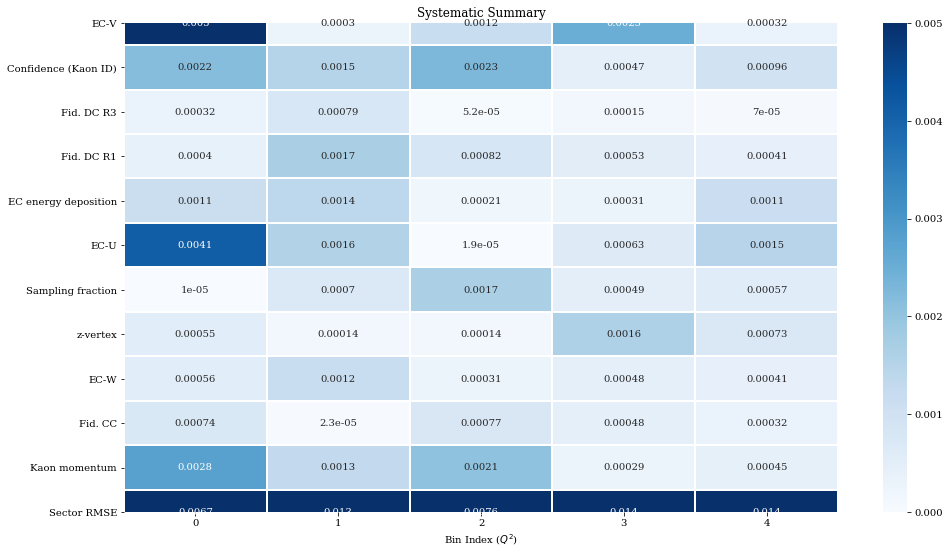

In [26]:
ax = plot_systematic_heatmap(data['fit'], 'q2', cols_to_plot, col_names)

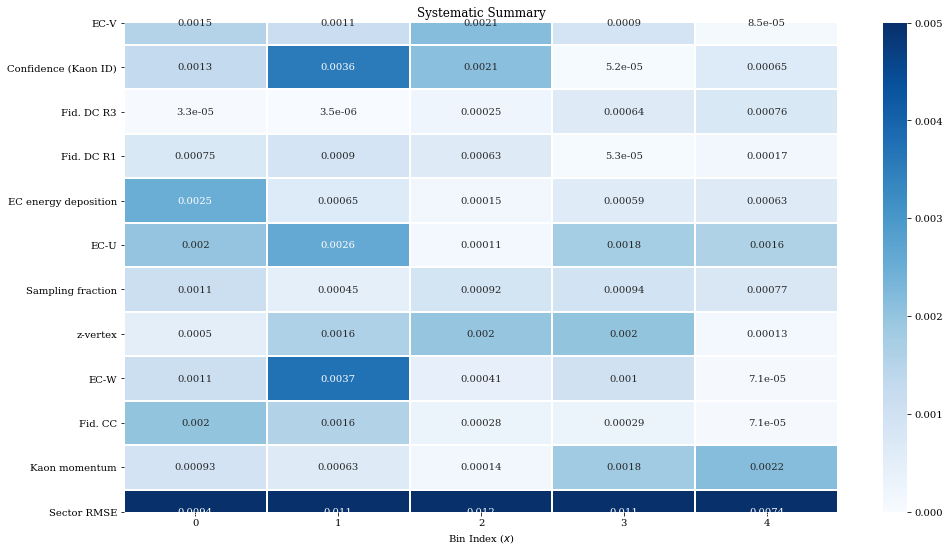

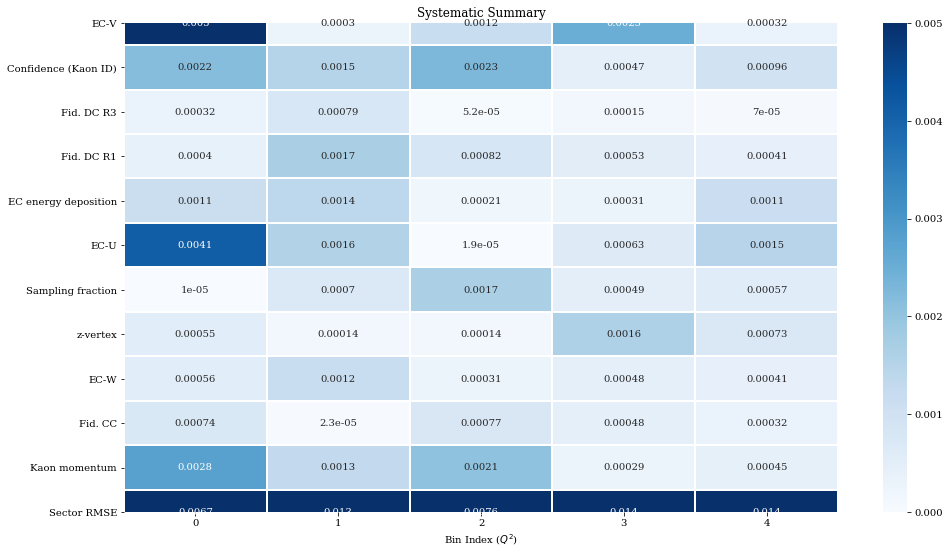

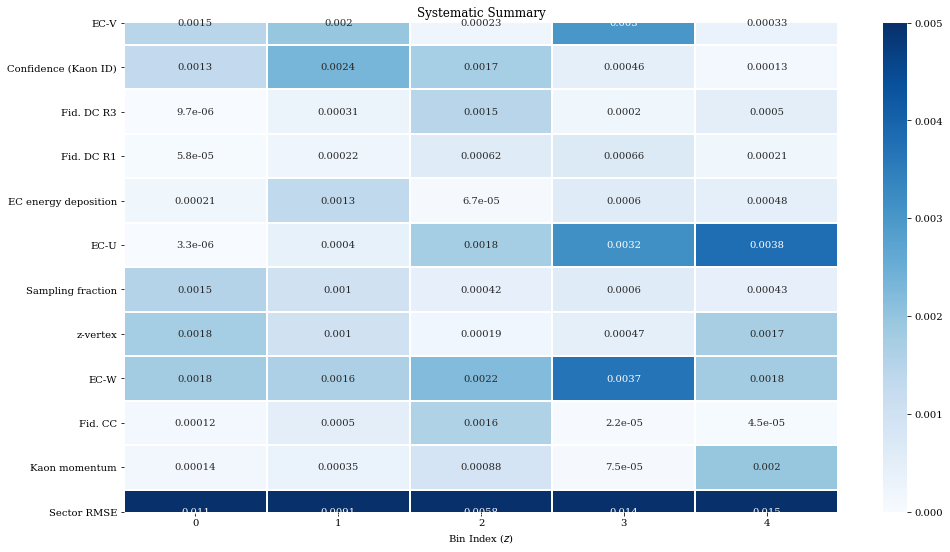

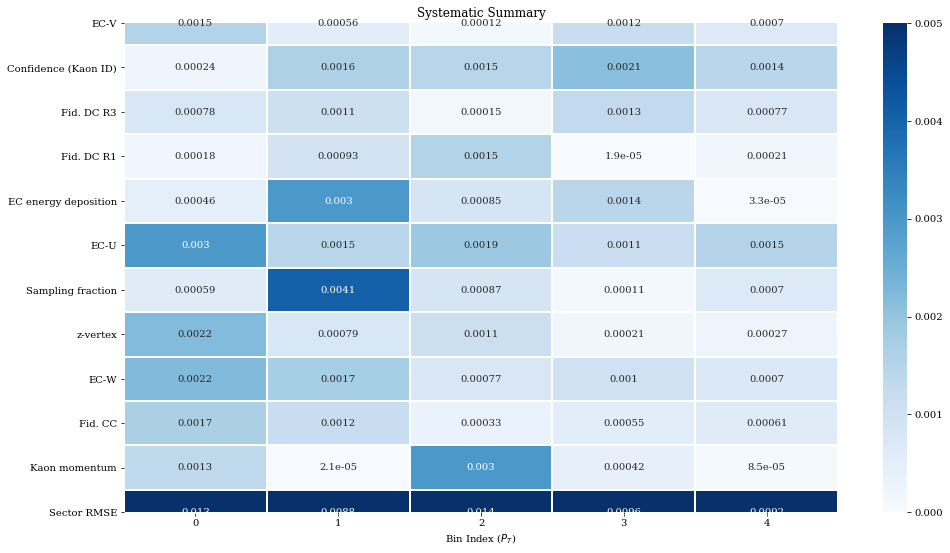

In [27]:
for axis in ['x', 'q2', 'z', 'pt']:
    _ = plot_systematic_heatmap(
        data['fit'], 
        axis, 
        cols_to_plot, 
        col_names
    )
    plt.savefig('image/systematics_integrated_heatmap_{}.pdf'.format(axis), 
               bbox_inches='tight')